**LUNG DISEASES CLASSIFICATION**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# ! pip show tensorflow
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

**IMPORTING LIBRARIES**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import datasets, layers, metrics
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory
from IPython.display import clear_output

**DISPLAYING THE RAW IMAGE OF CHESTXRAY**

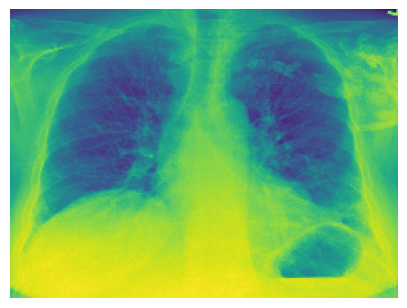

In [ ]:
# simply show a picture
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize= (5, 5))
img = mpimg.imread("/content/drive/MyDrive/lungxray/train/Corona Virus Disease/1.jpg")
plt.imshow(img)
plt.axis('off')
plt.show()

**PREPROCESSING**

1.   Resizing
2.   Rescaling


In [ ]:
ds_path = '/content/drive/MyDrive/lungxray/'
image_size = (224, 224)
batch_size = 32
seed = 24

train_ds = image_dataset_from_directory(ds_path+'train',
                                        image_size=image_size,
                                        label_mode='categorical',
                                        color_mode='rgb',
                                        seed=seed)
test_ds = image_dataset_from_directory(ds_path+'test',
                                       image_size=image_size,
                                       label_mode='categorical',
                                       color_mode='rgb',
                                       seed=seed)
val_ds = image_dataset_from_directory(ds_path+'val',
                                      image_size=image_size,
                                      label_mode='categorical',
                                      color_mode='rgb',
                                      seed=seed)
#training images
classes = train_ds.class_names
no_of_classes = len(classes)
print(classes)
plt.style.use('seaborn-white')
seed = 24
tf.random.set_seed(seed)

Found 4881 files belonging to 4 classes.
Found 1625 files belonging to 4 classes.
Found 1620 files belonging to 4 classes.
['Corona Virus Disease', 'Normal', 'Pneumonia', 'Tuberculosis']


<ipython-input-7-0dc274aa652b>:25: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


**Displaying the image of chestxray after Preprocessing**

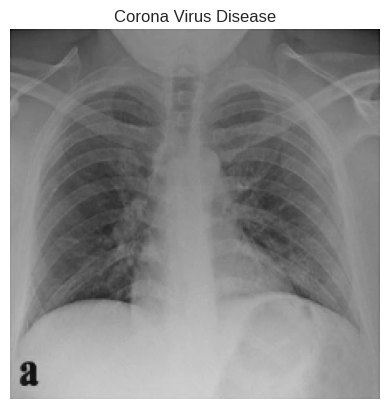

In [ ]:
import matplotlib.pyplot as plt
for images, labels in train_ds.take(1):  # Take one batch
    image = images[0].numpy().astype("uint8")  # Extract the first image from the batch
    label = train_ds.class_names[labels[0].numpy().argmax()]  # Extract the label of the first image
    plt.imshow(image)
    plt.title(label)
    plt.axis('off')
    plt.show()


**MODEL BILSTM**

In [ ]:
#model
four_class_model_bilstm = Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3),strides=1,padding='same', activation='relu', input_shape = (224,224,3)),
    layers.MaxPool2D((2,2),strides=2,padding='same'),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(3, 3),strides=1,padding='same', activation='relu'),
    layers.Conv2D(filters=64, kernel_size=(3, 3),strides=1,padding='same', activation='relu'),
    layers.MaxPool2D((2,2),strides=2,padding='same'),
    layers.BatchNormalization(),

    layers.Conv2D(filters=128, kernel_size=(3, 3),strides=1,padding='same', activation='relu'),
    layers.Conv2D(filters=128, kernel_size=(3, 3),strides=1,padding='same', activation='relu'),
    layers.MaxPool2D((2,2),strides=2,padding='same'),
    layers.BatchNormalization(),

    layers.Conv2D(filters=256, kernel_size=(3, 3),strides=1,padding='same', activation='relu'),
    layers.MaxPool2D((2,2),strides=2,padding='same'),
    layers.BatchNormalization(),

    layers.Conv2D(filters=512, kernel_size=(3, 3),strides=1,padding='same', activation='relu'),
    layers.MaxPool2D((2,2),strides=2,padding='same'),
    layers.BatchNormalization(),


    layers.Reshape((-1, 512)),
    layers.Bidirectional(layers.LSTM(512, return_sequences=True)),
    layers.Bidirectional(layers.LSTM(512)),

    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax'),
], name='four_class_model_bilstm')
four_class_model_bilstm.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy',
                       metrics.Precision(),
                       metrics.Recall(),
                       metrics.AUC()],run_eagerly=True)
four_class_model_bilstm.summary()
print(len(four_class_model_bilstm.layers))

Model: "four_class_model_bilstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 112, 112, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56,

In [ ]:
history = four_class_model_bilstm.fit(train_ds,
                    validation_data=val_ds,
                    epochs=15)

Epoch 1/15
153/153 [==============================] - 99s 633ms/step - loss: 0.0449 - accuracy: 0.9826 - precision: 0.9834 - recall: 0.9824 - auc: 0.9991 - val_loss: 0.5142 - val_accuracy: 0.8852 - val_precision: 0.8874 - val_recall: 0.8852 - val_auc: 0.9692
Epoch 2/15
153/153 [==============================] - 79s 505ms/step - loss: 0.0414 - accuracy: 0.9857 - precision: 0.9857 - recall: 0.9852 - auc: 0.9993 - val_loss: 0.5048 - val_accuracy: 0.8815 - val_precision: 0.8814 - val_recall: 0.8809 - val_auc: 0.9690
Epoch 3/15
153/153 [==============================] - 81s 520ms/step - loss: 0.0268 - accuracy: 0.9920 - precision: 0.9920 - recall: 0.9918 - auc: 0.9997 - val_loss: 0.1928 - val_accuracy: 0.9469 - val_precision: 0.9487 - val_recall: 0.9469 - val_auc: 0.9913
Epoch 4/15
153/153 [==============================] - 74s 475ms/step - loss: 0.0027 - accuracy: 0.9998 - precision: 0.9998 - recall: 0.9998 - auc: 1.0000 - val_loss: 0.1894 - val_accuracy: 0.9531 - val_precision: 0.9536 - v

**Evaluation**

In [ ]:
four_class_model_bilstm.evaluate(test_ds)

51/51 [==============================] - 498s 8s/step - loss: 0.1742 - accuracy: 0.9618 - precision: 0.9618 - recall: 0.9612 - auc: 0.9909


[0.17419953644275665,
 0.9618461728096008,
 0.9618226885795593,
 0.9612307548522949,
 0.9908938407897949]

**Model Saving**

In [ ]:
four_class_model_bilstm.save('four_class_model_bilstm.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


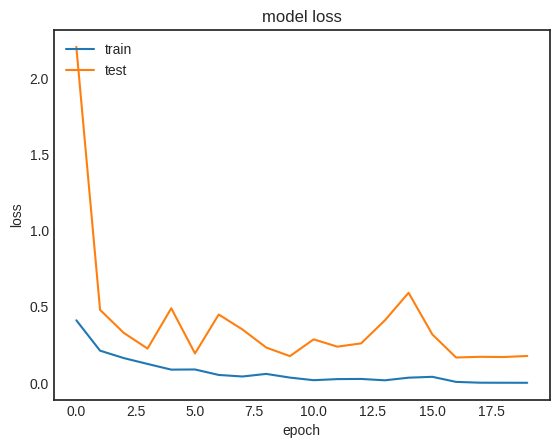

In [ ]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Found 1625 files belonging to 4 classes.
51/51 [==============================] - 7s 67ms/step

              precision    recall  f1-score   support

    COVID-19       0.97      0.97      0.97       407
      Normal       0.96      0.94      0.95       404
   Pneumonia       0.95      0.95      0.95       407
Tuberculosis       0.97      0.99      0.98       407

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



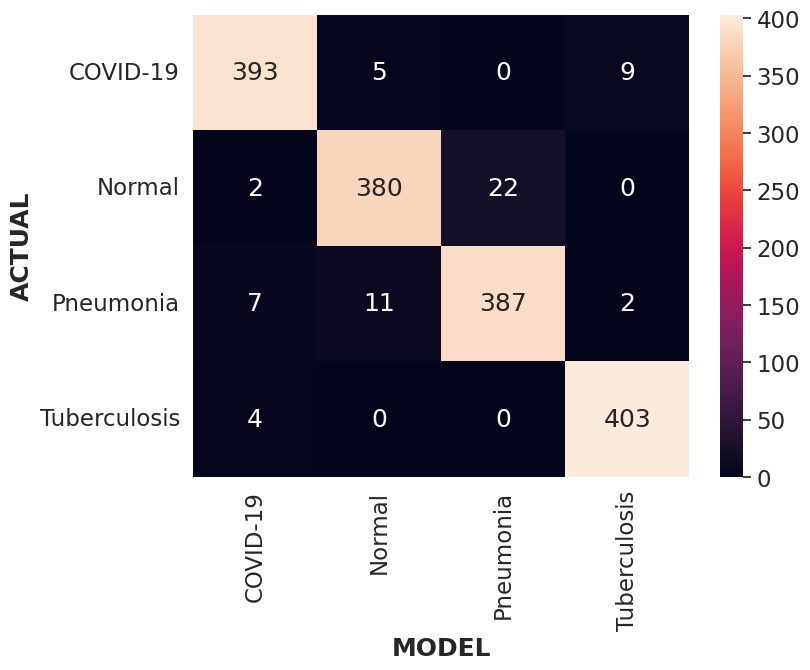

In [ ]:
# Multiclass Model Report & Confusion Matrix Heatmap
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report


model = load_model('/content/four_class_model_bilstm')
ds = image_dataset_from_directory('/content/drive/MyDrive/lungxray/test',
                                    image_size=image_size,
                                    label_mode='categorical',
                                    color_mode='rgb')

target_names = np.array(ds.class_names)
for i, t in enumerate(target_names):
    if t.lower().startswith('corona'):
        target_names[i] = 'COVID-19'
        break
X, Y = [], []
for x, y in ds.unbatch():
    X.append(x)
    Y.append(y)
X, Y = np.array(X), np.array(Y)
Y_true = target_names[Y.argmax(1)]
Y_pred = model.predict(X)
Y_pred = target_names[Y_pred.argmax(1)]
print()
print(classification_report(Y_true, Y_pred))
plt.figure(figsize=(8, 6))
sn.set(font_scale=1.5)
sn.heatmap(
    confusion_matrix(Y_true, Y_pred),
    annot = True, fmt='g', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('MODEL', fontweight='bold')
plt.ylabel('ACTUAL', fontweight='bold')
plt.show()

In [ ]:
#GradCAM Visualization
import cv2
class GradCAM:
    def __init__(self, model, classIdx, layerName=None):
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName
        if self.layerName is None:
            self.layerName = self.find_target_layer()

    def find_target_layer(self):
        for layer in reversed(self.model.layers):
            if len(layer.output_shape) == 4:
                return layer.name
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")

    def compute_heatmap(self, image, eps=1e-8):
        gradModel = keras.models.Model(
            inputs=[self.model.inputs],
            outputs=[self.model.get_layer(self.layerName).output, self.model.output])
        with tf.GradientTape() as tape:
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            loss = predictions[:, tf.argmax(predictions[0])]
        grads = tape.gradient(loss, convOutputs)
        castConvOutputs = tf.cast(convOutputs > 0, "float32")
        castGrads = tf.cast(grads > 0, "float32")
        guidedGrads = castConvOutputs * castGrads * grads
        convOutputs = convOutputs[0]
        guidedGrads = guidedGrads[0]
        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)
        (w, h) = (image.shape[2], image.shape[1])
        heatmap = cv2.resize(cam.numpy(), (w, h))
        numer = heatmap - np.min(heatmap)
        denom = (heatmap.max() - heatmap.min()) + eps
        heatmap = numer / denom
        heatmap = (heatmap * 255).astype("uint8")
        return heatmap

    def overlay_heatmap(self, heatmap, image, alpha=0.5,
                        colormap=cv2.COLORMAP_VIRIDIS):
        heatmap = cv2.applyColorMap(heatmap, colormap)
        print(heatmap.shape, image.shape, 'sdf')
        output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)
        return (heatmap, output)

1/1 [==============================] - 1s 1s/step
(224, 224, 3) (224, 224, 3) sdf


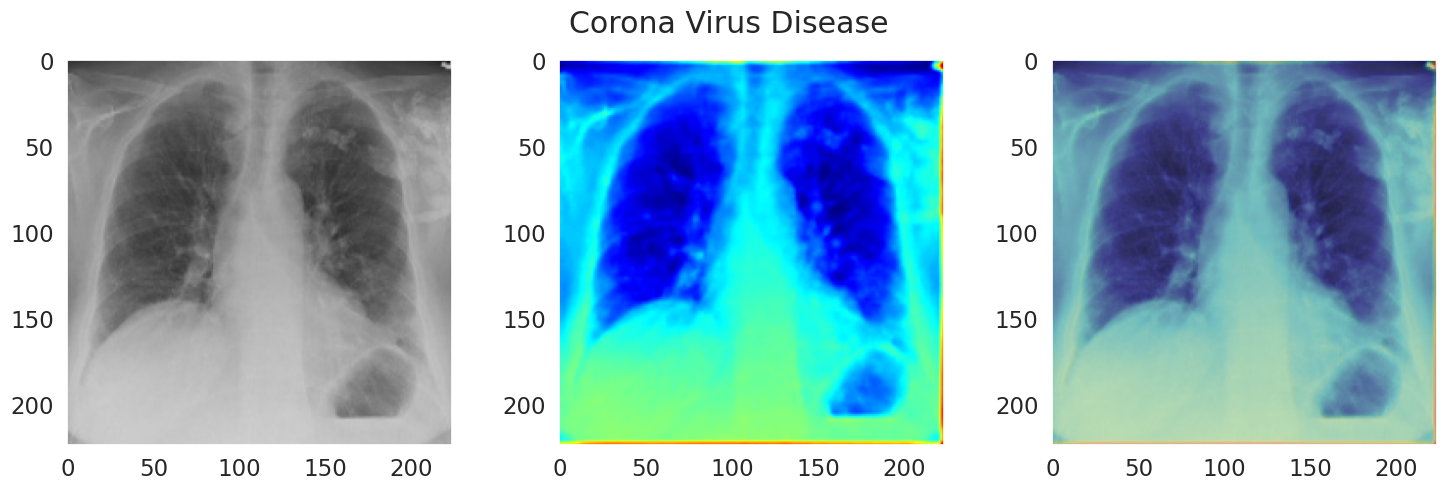

In [ ]:
import cv2
x_model = load_model(r"/content/four_class_model_bilstm")
image = cv2.imread(r"/content/drive/MyDrive/lungxray/train/Corona Virus Disease/1.jpg", cv2.IMREAD_COLOR)
image = cv2.resize(image, (224, 224))
inp = np.expand_dims(image, axis=0)


preds = x_model.predict(inp)
i = np.argmax(preds[0])
ti = ['Corona Virus Disease', 'Normal', 'Pneumonia', 'Tuberculosis'][i]
gcam = GradCAM(x_model, 1, 'max_pooling2d_49')
gcam = GradCAM(x_model, 1, 'conv2d_69')
gcam = GradCAM(x_model, 1, 'batch_normalization')

heatmap = gcam.compute_heatmap(inp)
(heatmap, output) = gcam.overlay_heatmap(heatmap, image, alpha=0.7, colormap=cv2.COLORMAP_JET)

fig, ax = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle(ti)
for axi in ax: axi.grid(None)
ax[0].imshow(image)
ax[1].imshow(cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB))
ax[2].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.show()
ax[1].imshow(heatmap)
ax[2].imshow(output)
plt.show()

In [ ]:
four_class_model_bilstm.save('four_class_model_bilstm.keras')


In [ ]:
import tensorflow as tf
print(tf.__version__)


2.15.0
